<a href="https://colab.research.google.com/github/Mubashar-Bashir/Langchain_EcoSystem/blob/main/Excise_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Excise & Taxation Agentic AI System

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_google_genai langchain_core langgraph

In [2]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('Gemini-key')

In [3]:
from google.colab import userdata
LANGCHAIN_API_KEY = userdata.get('LANGCHAIN_API_KEY')

In [4]:
# Step 1: Initial Setup
# Install Libraries
%%capture --no-stderr
%pip install --quiet -U langchain_google_genai langgraph

# Import Dependencies
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI


# API Key Setup
GEMINI_API_KEY = userdata.get('Gemini-key')
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=GEMINI_API_KEY)


In [5]:



# Step 2: Add Tools (Placeholder Functions for Excise Tasks)
def vehicle_verification(vehicle_Reg_no: str) -> str:
    """Verify vehicle registration."""
    return f"Vehicle {vehicle_Reg_no} is verified."

def calculate_tax(invoice_value: float) -> str:
    """Calculate tax."""
    return f"The tax on {invoice_value} is {invoice_value * 0.1}."

tools = [vehicle_verification, calculate_tax]

# Bind Tools to LLM
llm_with_tools = llm.bind_tools(tools)



In [19]:
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, StateGraph, END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display
from langgraph.prebuilt import tools_condition , ToolNode
# Step 3: Add Memory
memory = MemorySaver()

# Step 4: Define the State Graph
builder = StateGraph(MessagesState)
sys_msg = SystemMessage(content="You are an Excise & Taxation Punjab Assistant helping users with vehicle verification and tax calculations.")

#state schema
#class Ex_TAssistant(MessagesState):

#  pass

def Ex_TAssistant(state: MessagesState) -> MessagesState:
  return  {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

#node
builder.add_node("Ex_TAssistant", Ex_TAssistant )
builder.add_node("tools", ToolNode([vehicle_verification, calculate_tax]))

#edge
builder.add_edge(START, "Ex_TAssistant")

builder.add_conditional_edges("Ex_TAssistant", tools_condition)

#builder.add_edge("Ex_TAssistant", END)

builder.add_edge("tools","Ex_TAssistant" )

# Compile the Graph with Memory
react_graph_memory = builder.compile(checkpointer=memory)



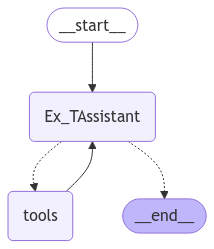

In [20]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod
display(
    Image(
        react_graph_memory.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [22]:

# Step 5: Test Basic Interaction
# Define Input and Thread ID
config = {"configurable": {"thread_id": "1"}}
messages = [HumanMessage(content="Verify vehicle ABC 123.")]

# Run the Graph
output = react_graph_memory.invoke({"messages": messages}, config)
for msg in output["messages"]:
    #print(msg.content)
    msg

In [26]:
react_graph_memory.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Verify vehicle ABC123.', additional_kwargs={}, response_metadata={}, id='782e19c5-35f2-48c9-bda4-af5eea4cdae5'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'vehicle_verification', 'arguments': '{"vehicle_Reg_no": "ABC123"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-3f506004-f329-4217-b4a4-9c9e1aab42dc-0', tool_calls=[{'name': 'vehicle_verification', 'args': {'vehicle_Reg_no': 'ABC123'}, 'id': '279d8822-6e4e-46d9-aeae-a817e33c785c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 108, 'output_tokens': 12, 'total_tokens': 120, 'input_token_details': {'cache_read': 0}}), ToolMessage(content='Vehicle ABC123 is verified.', name='vehicle_verification', id='4688d514-b321-44f5-a192-9409d47fe989', tool_call_id='279d8822-6e4e-46d9-aeae-a817e33c785c'), AIMessage(content='Vehicle ABC123 is verified.', additional_kw

In [29]:
# Step 5: Test Basic Interaction
# Define Input and Thread ID
config = {"configurable": {"thread_id": "1"}}
messages = [HumanMessage(content="calculate vehicle_Tax Reg Number ABC 123 invoice value 5000000")]

# Run the Graph
output = react_graph_memory.invoke({"messages": messages}, config)
for msg in output["messages"]:
    #print(msg.content)
    msg

In [30]:
print(msg)

content='The tax on 5000000.0 is 500000.0.\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-b242f981-1add-4d1e-8a67-b9513ab91e8c-0' usage_metadata={'input_tokens': 393, 'output_tokens': 25, 'total_tokens': 418, 'input_token_details': {'cache_read': 0}}


In [32]:
# Step 5: Test Basic Interaction
# Define Input and Thread ID
config = {"configurable": {"thread_id": "1"}}
messages = [HumanMessage(content="can you tell me the excise services you can provide")]

# Run the Graph
output = react_graph_memory.invoke({"messages": messages}, config)
for msg in output["messages"]:
    print(msg.content)


Verify vehicle ABC123.

Vehicle ABC123 is verified.
Vehicle ABC123 is verified.
Verify vehicle ABC123.

Vehicle ABC123 is verified.
Vehicle ABC123 is verified.

calculate vehicle_Tax Reg Number ABC 123 invoice value 50

The tax on 50.0 is 5.0.
The tax on 50.0 is 5.0.

calculate vehicle_Tax Reg Number ABC 123 invoice value 5000000

The tax on 5000000.0 is 500000.0.
The tax on 5000000.0 is 500000.0.

hi
Hello! How can I help you today?

can you tell me the excise services you can provide
I can help you with vehicle verification and tax calculations.  Specifically, I can:

* **Verify vehicle registration:**  Given a vehicle registration number, I can check if the vehicle is registered.
* **Calculate vehicle tax:** Given the invoice value of a vehicle, I can calculate the applicable tax.

Please let me know how I can assist you further.

